<a href="https://colab.research.google.com/github/thekkanathashish95/Projects/blob/master/Market%20Analytics%20-%20OLIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on Olist - Brazilian Startup in E-Commerce Segment

**A brief Introduction about the company**

- Founded: 2015
- Category: E-Commerce
- HQ:  Curitiba, Paraná
- Office: Sao Polo
- Number of Employees: 300

Basic Operation : Acts as an intermediary between sellers and customers across a wide geographical location


#### Importing Required libraries for Data Preprocessing and Primary Evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt 
from datetime import timedelta
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from keras.models import Sequential # Allows creation of neural network object represented in a sequence of layers
from keras.layers import Dense #Allows us to add the output layer
from keras.layers import LSTM # Allows addition of LSTM layers
from keras.layers import Dropout #Allows addition of dropout regularization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


####Importing Datasets for Preprocessing & Analysis.

In [ ]:
customers=pd.read_csv("olist_customers_dataset.csv")
order_items=pd.read_csv("olist_order_items_dataset.csv")
order_pay=pd.read_csv("olist_order_payments_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products=pd.read_csv("olist_products_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")
trans=pd.read_csv("product_category_name_translation.csv")

####Getting basic information about each dataframe and checking for null values

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


As can be observed, there are null values in the **orders and products** dataframe.

##Analysis of the customer base of Olist

####Top 10 States in terms of "Number of Customers

In [ ]:
# Finding the columns in customers dataset
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 States in terms of number of customers')

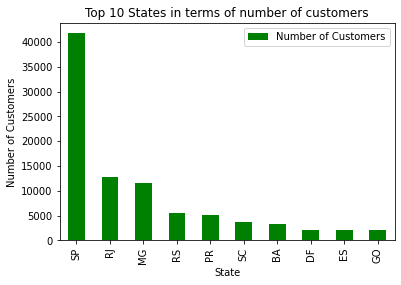

In [ ]:
#Grouping customers based on their states
cus=customers.groupby("customer_state")[["customer_id"]].count().sort_values("customer_id", ascending = False).head(10)
cus=cus.rename(columns={"customer_id":"Number of Customers"})

#Plotting the grouping
cus.plot.bar(color="green")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Top 10 States in terms of number of customers")

In [ ]:
cus

,Number of Customers
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Observations:** 
- Nearly 50% of the combined sales of the top 10 states belongs to Sao Polo
- There is huge difference in the customer base across different states.

####Top 10 Cities in terms of "Number of Customers"

Text(0.5, 1.0, 'Top 10 Cities in terms of number of customers')

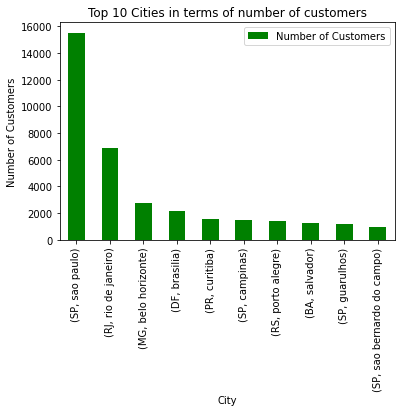

In [ ]:
#Grouping customers based on their cities
cit=customers.groupby(["customer_state","customer_city"])[["customer_id"]].count().sort_values("customer_id", ascending = False).head(10)
cit=cit.rename(columns={"customer_id":"Number of Customers"})

#Plotting the grouping
cit.plot.bar(color="green")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Top 10 Cities in terms of number of customers")

In [ ]:
cit

,,Number of Customers
customer_state,customer_city,
SP,sao paulo,15540
RJ,rio de janeiro,6882
MG,belo horizonte,2773
DF,brasilia,2131
PR,curitiba,1521
SP,campinas,1444
RS,porto alegre,1379
BA,salvador,1245
SP,guarulhos,1189


**Observation:** 
- The city of Sao Polo stands out in terms of customer concentration for Olist.

####Top 10 Postal Location in terms of Number of Customers

In [ ]:
customers.groupby(["customer_state", "customer_city","customer_zip_code_prefix"]).count().sort_values("customer_id", ascending = False).head(10)

customer_id  customer_unique_id
customer_state customer_city  customer_zip_code_prefix                                 
RJ             rio de janeiro 22790                             142                 142
               niteroi        24220                             124                 124
               rio de janeiro 22793                             121                 121
               niteroi        24230                             117                 117
               rio de janeiro 22775                             110                 110
ES             vila velha     29101                             101                 101
SP             jundiai        13212                              95                  95
MG             ipatinga       35162                              93                  93
RJ             rio de janeiro 22631                              89                  89
MG             uberlandia     38400                              87                  87

###Comparing Geographic Customer Distribution to the Population

####Importing file containing population distribution in brazil at the City level

In [ ]:
pop=pd.read_excel("Brazil_pop.xlsx")
pop.head()

,Unnamed: 0,City,State,2019,2010,Change
0,182,Ilhéus,Bahia,162327,176917,−8.25%
1,198,Rio das Ostras,Rio de Janeiro,150674,101508,0.4844
2,64,Boa Vista,Roraima,399213,277684,0.4377
3,238,São Félix do Xingu,Pará,128481,90908,0.4133
4,312,Nova Serrana,Minas Gerais,102693,73273,0.4015


This file was downloaded from online sources

In [ ]:
pop.columns

Index(['Unnamed: 0', 'City', 'State', 2019, 2010, 'Change'], dtype='object')

In [ ]:
#Removing unwanted columns
pop.pop(2010)
pop.pop("Unnamed: 0")
pop.pop("Change")

0      −8.25%
1      0.4844
2      0.4377
3      0.4133
4      0.4015
        ...  
319    0.0409
320    0.0303
321    0.0273
322    0.0222
323    0.0144
Name: Change, Length: 324, dtype: object

In [ ]:
pop.head()

,City,State,2019
0,Ilhéus,Bahia,162327
1,Rio das Ostras,Rio de Janeiro,150674
2,Boa Vista,Roraima,399213
3,São Félix do Xingu,Pará,128481
4,Nova Serrana,Minas Gerais,102693


####Top 10 most populated states in Brazil

                        2019
State                       
 São Paulo          34906339
 Rio de Janeiro     15462123
 Minas Gerais        9754088
 Bahia               6157870
 Paraná              6125350
 Rio Grande do Sul   5486945
 Pernambuco          4764151
 Pará                4475988
 Ceará               4234727
 Goiás               4100814


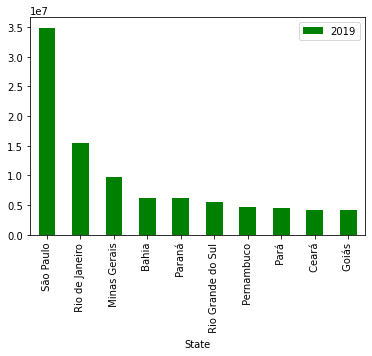

In [ ]:
#Grouping based on population
p_state=pop.groupby(["State"])[[2019]].sum().sort_values(2019, ascending = False).head(10)

#Plotting the grouping
p_state.plot.bar(color = "green")

print(p_state)

####Top 10 most populated Cities in Brazil

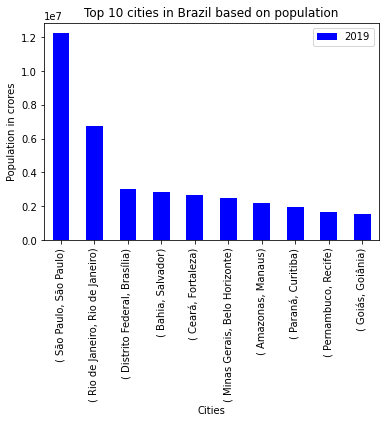

                                      2019
State             City                    
 São Paulo        São Paulo       12252023
 Rio de Janeiro   Rio de Janeiro   6718903
 Distrito Federal Brasília         3015268
 Bahia            Salvador         2872347
 Ceará            Fortaleza        2669342
 Minas Gerais     Belo Horizonte   2512070
 Amazonas         Manaus           2182763
 Paraná           Curitiba         1933105
 Pernambuco       Recife           1645727
 Goiás            Goiânia          1516113


In [ ]:
#Grouping based on population in cities
p_city=pop.groupby(["State","City"])[[2019]].sum().sort_values(2019, ascending = False).head(10)

#plotting the grouping
p_city.plot.bar(color = "blue")
plt.xlabel("Cities")
plt.ylabel("Population in crores")
plt.xticks(rotation=90)
plt.title("Top 10 cities in Brazil based on population")
plt.show()

print(p_city)

####Finding the percentage of customers on population for the top 5 States 

In [ ]:
#Pivoting to find out the population of different states
pop_state=pd.pivot_table(data=pop, values=2019, index= "State", aggfunc='sum').sort_values(2019, ascending = False)
pop_state=pop_state.head(10)
pop_state

,2019
State,
São Paulo,34906339
Rio de Janeiro,15462123
Minas Gerais,9754088
Bahia,6157870
Paraná,6125350
Rio Grande do Sul,5486945
Pernambuco,4764151
Pará,4475988
Ceará,4234727


In [ ]:
#Temporary variable to help mapping number of customers and states
cus1=customers.groupby("customer_state")[["customer_id"]].count().sort_values("customer_id", ascending = False).head(20)
cus1.head()

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


In [ ]:
#Hardcoding the Number of customers belonging to these states
pop_state["No. of Customers"]= [41746,12852,11635,5045,3380,5466,1652,975,1336,2020]

#Finding the percentage

pop_state["Percentage of Population"]=pop_state["No. of Customers"]/pop_state[2019]
pop_state.sort_values("Percentage of Population", ascending=False)

,2019,No. of Customers,Percentage of Population
State,,,
São Paulo,34906339,41746,0.001196
Minas Gerais,9754088,11635,0.001193
Rio Grande do Sul,5486945,5466,0.000996
Rio de Janeiro,15462123,12852,0.000831
Bahia,6157870,5045,0.000819
Paraná,6125350,3380,0.000552
Goiás,4100814,2020,0.000493
Pernambuco,4764151,1652,0.000347
Ceará,4234727,1336,0.000315


**Observations:**

- Sao Polo and Minas Gerais have better customer penetration compared to the rest of the 5 states.
- Overall, the customer penetration for the business during the period under study across the states **can be improved**

###Analyzing Based on GDP Per capita of the top 10 States

####Importing Dataset sourced from Wikipedia

In [ ]:
eco=pd.read_excel("Final Economic.xlsx")
eco.sort_values("GRP US", ascending= False).head(5)

,Unnamed: 0,GRP US,GRP PC
32,Total,1793.312,8727
30,Southeast Region [†],981.445,11294
27,São Paulo,583.077,13056
29,South Region [†],305.465,10320
15,Northeast Region [†],257.135,4495


In [ ]:
pop_state["PC_GDP"]=[13056,11032,7436,4854,10242,10379,5096,4784,4426,7779]

In [ ]:
pop_state

,2019,No. of Customers,Percentage of Population,PC_GDP
State,,,,
São Paulo,34906339,41746,0.001196,13056
Rio de Janeiro,15462123,12852,0.000831,11032
Minas Gerais,9754088,11635,0.001193,7436
Bahia,6157870,5045,0.000819,4854
Paraná,6125350,3380,0.000552,10242
Rio Grande do Sul,5486945,5466,0.000996,10379
Pernambuco,4764151,1652,0.000347,5096
Pará,4475988,975,0.000218,4784
Ceará,4234727,1336,0.000315,4426


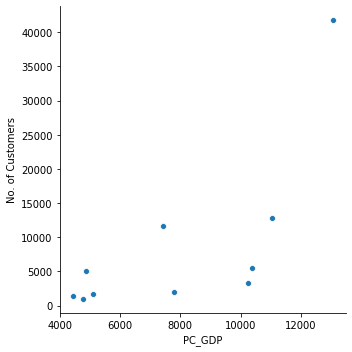

In [ ]:
sns.relplot(x="PC_GDP", y="No. of Customers", data=pop_state)

As can be observed, with the limited data, strict linear relationship cannot be observed between the Per Capita GDP and the Number of customers of each state

In [ ]:
print(pop_state.sort_values("PC_GDP", ascending= False))
print(pop_state.sort_values("No. of Customers", ascending= False))

                        2019  ...  PC_GDP
State                         ...        
 São Paulo          34906339  ...   13056
 Rio de Janeiro     15462123  ...   11032
 Rio Grande do Sul   5486945  ...   10379
 Paraná              6125350  ...   10242
 Goiás               4100814  ...    7779
 Minas Gerais        9754088  ...    7436
 Pernambuco          4764151  ...    5096
 Bahia               6157870  ...    4854
 Pará                4475988  ...    4784
 Ceará               4234727  ...    4426

[10 rows x 4 columns]
                        2019  ...  PC_GDP
State                         ...        
 São Paulo          34906339  ...   13056
 Rio de Janeiro     15462123  ...   11032
 Minas Gerais        9754088  ...    7436
 Rio Grande do Sul   5486945  ...   10379
 Bahia               6157870  ...    4854
 Paraná              6125350  ...   10242
 Goiás               4100814  ...    7779
 Pernambuco          4764151  ...    5096
 Ceará               4234727  ...    4426
 Pará      

In [ ]:
pop_state.sort_values("PC_GDP", ascending= False)

,2019,No. of Customers,Percentage of Population,PC_GDP
State,,,,
São Paulo,34906339,41746,0.001196,13056
Rio de Janeiro,15462123,12852,0.000831,11032
Rio Grande do Sul,5486945,5466,0.000996,10379
Paraná,6125350,3380,0.000552,10242
Goiás,4100814,2020,0.000493,7779
Minas Gerais,9754088,11635,0.001193,7436
Pernambuco,4764151,1652,0.000347,5096
Bahia,6157870,5045,0.000819,4854
Pará,4475988,975,0.000218,4784


As can be observed, Rio de Janeiro has richer population but the customer penetration of the state is lesser compared to the rest of the state. Suprisingly, when we analysed the postal code level of customer distribution, we found that the cities of Rio de Janeiro and Niteroi had those geo clusters with highest customer penetration. On closer analysis, we can observe why these cities stand out. Rio is the headquarters for most of oil, mining and telecommunication companies. Niteroi has the **highest human development** index of the state, indicating better standard of living and is also the second municipality with the highest average monthly household income per capita in Brazil.

Thoughts:

- Marketing activities in the states of Rio Grande do Sul and Parana should be improved so as to take advantage of the richer population.
- Largest customer base are from areas characterised by better standard of living and better per capita income.
- Marketing team should identify such locations and improve the circulation of digital contents.

####Identifying Top Revenue Generating States

In [ ]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
order_pay.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
#combing dataset containing order and payment informations
pur=order_pay.merge(right=orders, how="left", on="order_id")
pur.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
#Deleting unwanted columns
pur.drop([ 'payment_sequential','order_status',
       'payment_installments',  
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],1)

,order_id,payment_type,payment_value,customer_id
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,0a8556ac6be836b46b3e89920d59291c
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,f2c7fc58a9de810828715166c672f10a
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,25b14b69de0b6e184ae6fe2755e478f9
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,7a5d8efaaa1081f800628c30d2b0728f
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31,5d576cb2dfa3bc05612c392a1ee9c654
103882,7b905861d7c825891d6347454ea7863f,credit_card,96.80,2079230c765a88530822a34a4cec2aa0
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77,e4abb5057ec8cfda9759c0dc415a8188
103884,b8b61059626efa996a60be9bb9320e10,credit_card,369.54,5d719b0d300663188169c6560e243f27


In [ ]:
#Calculating total revenue generated from each customer
cus_tot_pay=pur.groupby("customer_id")["payment_value"].sum().sort_values(ascending= False).reset_index()
cus_tot_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    99440 non-null  object 
 1   payment_value  99440 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
cus_tot_pay.head()

,customer_id,payment_value
0,1617b1357756262bfa56ab541c47bc16,13664.08
1,ec5b2ba62e574342386871631fafd3fc,7274.88
2,c6e2731c5b391845f6800c97401a43a9,6929.31
3,f48d464a0baaea338cb25f816991ab1f,6922.21
4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66


In [ ]:
#Calculating total number of orders placed by each customer
cus_tot=pur.groupby("customer_id")["order_id"].count().sort_values(ascending= False).reset_index()
cus_tot

,customer_id,order_id
0,9af2372a1e49340278e7c1ef8d749f34,29
1,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
2,b246eeed30b362c09d867b9e598bee51,22
3,270c23a11d024a44c896d1894b261a83,21
4,eed931d3a5222a9a511d18be7fd2a5ba,19
...,...,...
99435,a92da5f6ab925f1b45c83cef38a87fe0,1
99436,a92daa58ac5dd4507c9d8846805f68a8,1
99437,a92dc6eff829713a8baf8aaac87cc7e1,1
99438,a92dcbd9afbc87cfcf0923eed2df56ab,1


In [ ]:
#merging each customers payment amount to his number of purchases
cust=cus_tot_pay.merge(right=cus_tot, how="left", on="customer_id")
cust.sort_values(by="order_id", ascending=False ).head()

,customer_id,payment_value,order_id
4878,9af2372a1e49340278e7c1ef8d749f34,457.99,29
74098,92cd3ec6e2d643d4ebd0e3d6238f69e2,62.68,26
88731,b246eeed30b362c09d867b9e598bee51,40.85,22
29196,270c23a11d024a44c896d1894b261a83,161.32,21
61229,eed931d3a5222a9a511d18be7fd2a5ba,82.73,19


In [ ]:
#merging customer's basic information to his purchasing activties
c=cust.merge(right=customers, how="right", on="customer_id")
c.head()

,customer_id,payment_value,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1617b1357756262bfa56ab541c47bc16,13664.08,1.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ
1,ec5b2ba62e574342386871631fafd3fc,7274.88,1.0,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES
2,c6e2731c5b391845f6800c97401a43a9,6929.31,1.0,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS
3,f48d464a0baaea338cb25f816991ab1f,6922.21,1.0,459bef486812aa25204be022145caa62,29066,vitoria,ES
4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,1.0,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP


In [ ]:
#dataset containing revenue generated by each state
rev_state=c.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False).reset_index()
rev_state

,customer_state,payment_value
0,SP,5998226.96
1,RJ,2144379.69
2,MG,1872257.26
3,RS,890898.54
4,PR,811156.38
5,SC,623086.43
6,BA,616645.82
7,DF,355141.08
8,GO,350092.31
9,ES,325967.55


In [ ]:
#Finding the top 10 revenue generating states
rev_state.head(20)

,customer_state,payment_value
0,SP,5998226.96
1,RJ,2144379.69
2,MG,1872257.26
3,RS,890898.54
4,PR,811156.38
5,SC,623086.43
6,BA,616645.82
7,DF,355141.08
8,GO,350092.31
9,ES,325967.55


Combining the revenue generated per state to other parameters discovered previously

In [ ]:
#Hardcoding revenue generated
pop_state["rev_gen"]=[5998226.96,2144379.69,1872257.26,616645.82,811156.38,890898.54,324850.44,218295.85,279464.03,350092.31]

In [ ]:
x=pop_state.sort_values("rev_gen", ascending=False)

In [ ]:
#Finding percentage of contribution by Sao Polo to total revenue
print(5998226.96/(pop_state["rev_gen"].sum()))

0.4441069346289436


In [ ]:
x=x.reset_index()

In [ ]:
x.columns

Index([                   'State',                       2019,
               'No. of Customers', 'Percentage of Population',
                         'PC_GDP',                  'rev_gen'],
      dtype='object')

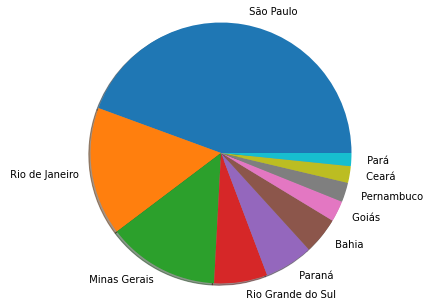

In [ ]:
#Pie Chart showing each states contribution to total revenue
plt.pie("rev_gen", labels="State", shadow=True, radius=1.5, data=x)
plt.show()

Similar to its proportation to the population, Sao Polo leads in terms of revenue generated for Olist. Sao Polo contributes to 44% of the revenue generated by Olist from among its top 10 revenue generating states. 

####Identifying the States with High Average Revenue Generation per customer

In [ ]:
#Calculating the average revenue generated by each state

pop_state["avg_rev"]=pop_state["rev_gen"]/pop_state["No. of Customers"]
pop_state.sort_values("avg_rev", ascending=False)

,2019,No. of Customers,Percentage of Population,PC_GDP,rev_gen,avg_rev
State,,,,,,
Paraná,6125350,3380,0.000552,10242,811156.38,239.987095
Pará,4475988,975,0.000218,4784,218295.85,223.893179
Ceará,4234727,1336,0.000315,4426,279464.03,209.179663
Pernambuco,4764151,1652,0.000347,5096,324850.44,196.640702
Goiás,4100814,2020,0.000493,7779,350092.31,173.313025
Rio de Janeiro,15462123,12852,0.000831,11032,2144379.69,166.851828
Rio Grande do Sul,5486945,5466,0.000996,10379,890898.54,162.989122
Minas Gerais,9754088,11635,0.001193,7436,1872257.26,160.915966
São Paulo,34906339,41746,0.001196,13056,5998226.96,143.683873


In [ ]:
pop_state=pop_state.reset_index()

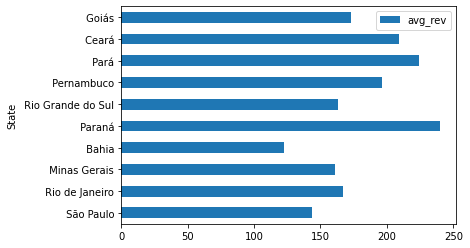

In [ ]:
pop_state.plot.barh(x="State",y="avg_rev")

The above graph illustrates that Parana and Para are the two states with highest average revenue generation. It means, the average amount of revenue generated by each customer belonging to these states are higher compared to the rest.

Interestingly, Parana holds the headquarter for Olist. Apart from that, main economic activities are agriculture based. So, the reason probably would be that the few customers who actually engage in ecommerce woukd be wealthy and they engage trade that involve something costly and not easily available in local market.

The market of Para is similar to that of Parana and is home to amazon rain forest.

Insight:

- Olist should identify the products being sold in these markets and should push the promotion of these products to similar less economically advanced areas. Chance for sale of something that they cannot obtain from local market is higher in these segments like Parana and Para


In [ ]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
pur.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

###Analysing the Payment Habit of Customers

####The most preferred payment methods by the customers

In [ ]:
#Grouping Customers based on their method of payment
cus_pay_type=pur.groupby("payment_type")["customer_id"].count().sort_values(ascending=False)

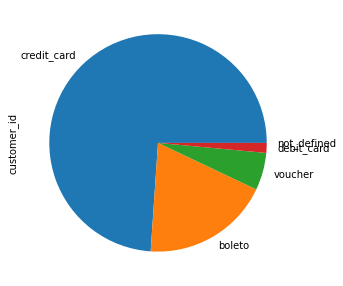

In [ ]:
#plotting the payment preferences
cus_pay_type.plot.pie(y="customer_id",figsize=(5, 5))

In [ ]:
#Number of payments made per each type of payment
cus_pay_type

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: customer_id, dtype: int64

- As can be observed, most of the transactions happen through credit card.
- Boleto Bancário, simply referred to as Boleto (English: Ticket) is a payment method in Brazil regulated by FEBRABAN, short for Brazilian Federation of Banks.


##Analysis of Products for Olist

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
trans.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [ ]:
products=products.merge(right=trans, how="left", on="product_category_name")
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

####Top 10 Most frequently sold products and their categories

In [ ]:
p1=order_items.merge(right=products, how="inner", on="product_id")

In [ ]:
p1.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
#Finding the most sold products and their categories
p2=p1.groupby(["product_category_name_english","product_id"])["order_id"].count().sort_values(ascending= False).head(10).reset_index()
p2

,product_category_name_english,product_id,order_id
0,furniture_decor,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,bed_bath_table,99a4788cb24856965c36a24e339b6058,488
2,garden_tools,422879e10f46682990de24d770e7f83d,484
3,garden_tools,389d119b48cf3043d311335e499d9c6b,392
4,garden_tools,368c6c730842d78016ad823897a372db,388
5,garden_tools,53759a2ecddad2bb87a079a1f1519f73,373
6,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,343
7,watches_gifts,53b36df67ebb7c41585e8d54d6772e08,323
8,health_beauty,154e7e31ebfa092203795c972e5804a6,281
9,computers_accessories,3dd2a17168ec895c781a9191c1e95ad7,274


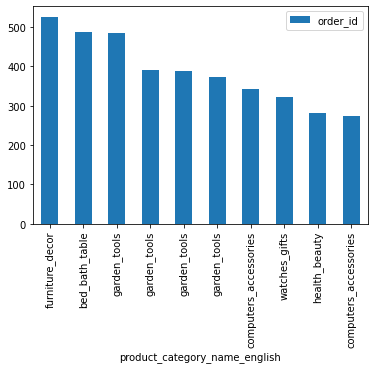

In [ ]:
p2.plot.bar(x="product_category_name_english")

Please note that in the graph i have substituted Category name for the name of the product for better understanding.

Inferences:
- Top selling product belongs to "furniture and decoration" category
- Products from the category of Garden tool and Computer accessories are also among the most sold

####Top 10 Most frequently sold product categories

In [ ]:
p1.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_id, dtype: int64


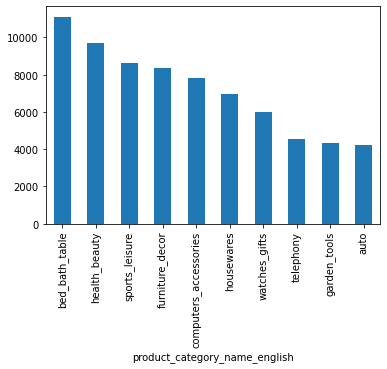

In [ ]:
pr_cat=p1.groupby("product_category_name_english")["product_id"].count().sort_values(ascending=False).head(10)
pr_cat.plot.bar()
print(pr_cat)

On contrary to the findings from best selling products, most sold product categoies are 
1. Bed Bath & Table
2. Health & Beauty
3. Sports & Leisure

####Top 10 most revenue generating products

  product_category_name_english                        product_id     price
0                 health_beauty  bb50f2e236e5eea0100680137654686c  63885.00
1                 health_beauty  6cdd53843498f92890544667809f1595  54730.20
2                     computers  d6160fb7873f184099d9bc95e30376af  48899.34
3         computers_accessories  d1c427060a0f73f6b889a5c7c61f2ac4  47214.51
4                bed_bath_table  99a4788cb24856965c36a24e339b6058  43025.56
5         computers_accessories  3dd2a17168ec895c781a9191c1e95ad7  41082.60
6                          baby  25c38557cf793876c5abdd5931f922db  38907.32
7                    cool_stuff  5f504b3a1c75b73d6151be81eb05bdc9  37733.90
8                 watches_gifts  53b36df67ebb7c41585e8d54d6772e08  37683.42
9               furniture_decor  aca2eb7d00ea1a7b8ebd4e68314663af  37608.90


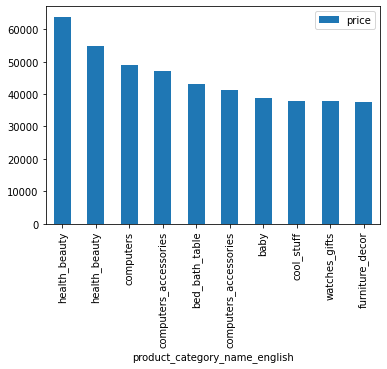

In [ ]:
p5=p1.groupby(["product_category_name_english","product_id"])["price"].sum().sort_values(ascending= False).head(10).reset_index()
p5.plot.bar(x="product_category_name_english",y="price")
print(p5)

Please note that i have used the name of the product category instead of product for better understanding.
- The most revenue generating product is - bb50f2e236e5eea0100680137654686c and it belongs to health and beauty category

####10 Most revenue generating product categories

product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64


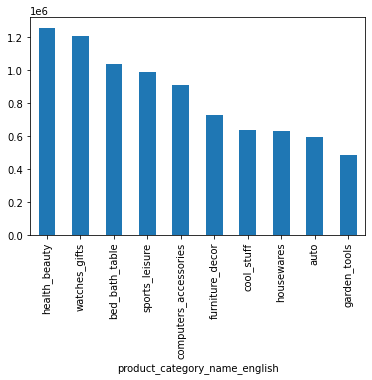

In [ ]:
pr_cat=p1.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False).head(10)
pr_cat.plot.bar()
print(pr_cat)

Even though the most sold product category was bed bath and table, the most revenue generating category is health and beauty.

An important point to notice here is the revenue generation by watches and gift. Even though it ranked 7th in the top most selling product category, it ended up ranking second as the most revenue generating product.

The culture of olist might be complimenting this development as Olist started out being a handmade products.

####Analyzing the effect of Product features on freight charge

In [ ]:
#creating a temporary dataframe for the analysis
temp_freight=products[['product_id','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']]
temp_freight=temp_freight.merge(right=order_items, on="product_id")
temp_freight.columns

Index(['product_id', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
temp_freight.groupby(["product_id","freight_value"])["order_id"].count().sort_values(ascending= False).reset_index().head(20)

,product_id,freight_value,order_id
0,53b36df67ebb7c41585e8d54d6772e08,0.00,187
1,aca2eb7d00ea1a7b8ebd4e68314663af,13.08,134
2,aca2eb7d00ea1a7b8ebd4e68314663af,0.00,98
3,53759a2ecddad2bb87a079a1f1519f73,17.67,98
4,389d119b48cf3043d311335e499d9c6b,17.67,95
5,422879e10f46682990de24d770e7f83d,17.67,93
6,154e7e31ebfa092203795c972e5804a6,7.78,82
7,368c6c730842d78016ad823897a372db,17.67,82
8,aca2eb7d00ea1a7b8ebd4e68314663af,12.43,79
9,99a4788cb24856965c36a24e339b6058,12.13,70


The above analysis shows that there can be more than one freight value for the same product.

In [ ]:
temp_freight.groupby("product_id")["freight_value"].mean().sort_values(ascending= False).reset_index()

,product_id,freight_value
0,ec31d2a17b299511e7c8627be9337b9b,409.680000
1,256a9c364b75753b97bee410c9491ad8,339.590000
2,7e53e051875b2a0c9f22acd8a9a29a20,317.470000
3,a3cd9517ebf5a50dca25acce54f3b171,308.336667
4,3a1855685a49813f60e6193864f7215e,306.060000
...,...,...
32946,ca165220cdeb3367ea870193baf4a7cd,0.030000
32947,aa0568a1b7093748a1922993f5817983,0.030000
32948,baf59a3a8f15ea34f04394f44bad573a,0.020000
32949,11b906b2a09fb80668f4478dd3f9c324,0.020000


In [ ]:
temp_freight.corr()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value
product_weight_g,1.000000,0.460919,0.583277,0.506609,-0.003549,0.338819,0.610420
product_length_cm,0.460919,1.000000,0.192895,0.532537,0.005628,0.145811,0.309086
product_height_cm,0.583277,0.192895,1.000000,0.281224,0.029323,0.223602,0.391831
product_width_cm,0.506609,0.532537,0.281224,1.000000,-0.010732,0.172467,0.323777
order_item_id,-0.003549,0.005628,0.029323,-0.010732,1.000000,-0.060522,-0.029380
price,0.338819,0.145811,0.223602,0.172467,-0.060522,1.000000,0.414204
freight_value,0.610420,0.309086,0.391831,0.323777,-0.029380,0.414204,1.000000


As can be observed from the above table, the highest correlation between the products features and freight value is of product weight with .61

##Analysis of Sales for Olist

####Trend of Revenue Generated over time

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
order_pay.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
#converting dates from strings to datetime objects for manipulation
orders["order_purchase_timestamp"]=pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"]=pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_carrier_date"]=pd.to_datetime(orders["order_delivered_carrier_date"])
orders["order_delivered_customer_date"]=pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"]=pd.to_datetime(orders["order_estimated_delivery_date"])

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
#inorder to plot to find out the revenue generated overtime, we are creating a new temporary dataset
X=orders[["order_id","customer_id","order_purchase_timestamp"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [ ]:
Xx=X.merge(right=order_items, how="inner", on="order_id")
timeplay=Xx[["order_id","customer_id","order_purchase_timestamp","product_id","price"]]
timeplay.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price'],
      dtype='object')

In [ ]:
# #timeplay["month-year"]=timeplay['order_purchase_timestamp'].dt.strftime('%Y-%m')
# #timeplay['month'] = timeplay['order_purchase_timestamp'].dt.month
# timeplay['year'] = timeplay['order_purchase_timestamp'].dt.year
# timeplay.set_index("month-year", inplace=True)
# timeplay.groupby(["year","month"])["order_id"].count()
# timeplay.plot.hist()

In [ ]:
timeplay["order_purchase_timestamp"]=timeplay["order_purchase_timestamp"].dt.normalize()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


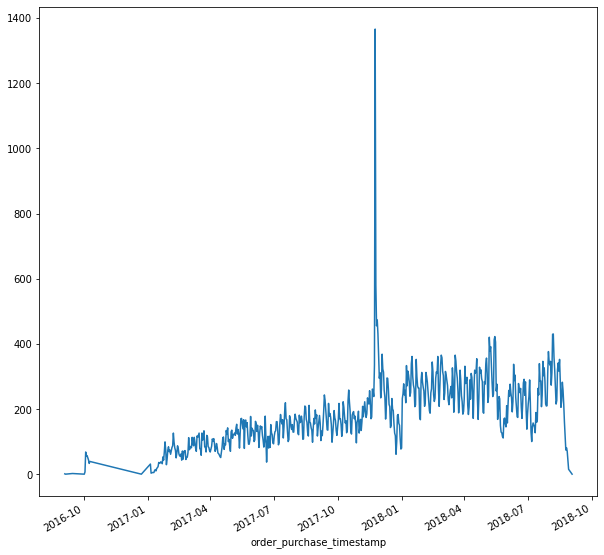

In [ ]:
tp=timeplay.groupby("order_purchase_timestamp")["order_id"].count()
tp.plot(figsize=(10,10))

As can be observed from the chart, there is an overall gradual increase. But there is an unusual spike in December 2017.

####Investigating the unusual spike of November 2017

In [ ]:
start=pd.to_datetime("2017-09-01")
end=pd.to_datetime("2018-01-31")

In [ ]:
mask = (timeplay['order_purchase_timestamp'] > start) & (timeplay['order_purchase_timestamp'] <= end)
f_timeplay=timeplay.loc[mask]
f_timeplay

,order_id,customer_id,order_purchase_timestamp,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,87285b34884572647811a353c7ac498a,29.99
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
17,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,2018-01-02,638bbb2a5e4f360b71f332ddfebfd672,1299.00
18,116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,2017-12-26,a47295965bd091207681b541b26e40a5,27.99
19,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,2017-11-21,cce679660c66e6fbd5c8091dfd29e9cd,17.90
...,...,...,...,...,...
112639,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,2017-12-20,3d2c44374ee42b3003a470f3e937a2ea,55.90
112640,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,2017-10-04,c982dbea53b864f4d27c1d36f14b6053,42.11
112641,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,2017-10-04,49d2e2460386273b195e7e59b43587c3,26.90
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


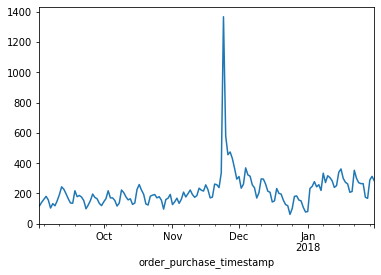

In [ ]:
f_timeplay=f_timeplay.groupby("order_purchase_timestamp")["order_id"].count()
f_timeplay.plot()

As you can observe, the spike is around 24-30th of November 2016

In [ ]:
start=pd.to_datetime("2017-11-20")
end=pd.to_datetime("2017-11-26")

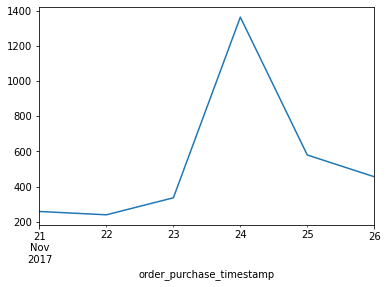

In [ ]:
mask = (timeplay['order_purchase_timestamp'] > start) & (timeplay['order_purchase_timestamp'] <= end)
f1_timeplay=timeplay.loc[mask]
f1_timeplay_grp=f1_timeplay.groupby("order_purchase_timestamp")["order_id"].count()
f1_timeplay_grp.plot()

As you can observe, the unusual spike in sales happened on 24th November. We looked over for the day in the news and found nothing worth stimulating sales happened in the week

https://en.wikipedia.org/wiki/2017_in_Brazil#November 

In [ ]:
f1_timeplay.reset_index()

,index,order_id,customer_id,order_purchase_timestamp,product_id,price
0,19,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,2017-11-21,cce679660c66e6fbd5c8091dfd29e9cd,17.90
1,43,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24,be021417a6acb56b9b50d3fd2714baa8,339.00
2,112,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,2017-11-22,f8a8f05a35976a91aed5cccc3992c357,83.90
3,131,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,2017-11-26,f2e53dd1670f3c376518263b3f71424d,109.90
4,144,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,2017-11-24,a6ad77b15e566298a4e8ee2011ab1255,31.80
...,...,...,...,...,...,...
3230,112541,5bec661a2baad6bf4d879a4be9759675,9e4072d0ce7938bb2414801f9b12f511,2017-11-22,cad2db5e318d7283a234c517b2f28a42,105.90
3231,112593,c0524fb1b4c905d054adbddaffa2380c,92e8f9754238b9697d9dcbe02c20fc70,2017-11-24,738da8ddda2e593acfdc53c2d1520dfa,79.90
3232,112611,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,2017-11-26,ea4f4b5a820fea007c6c8d7ef9a790bc,45.73
3233,112619,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,2017-11-26,526f833e1eb0a32ad9351145a761b9ab,129.00


In [ ]:
f1_timeplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 19 to 112631
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  3235 non-null   object        
 1   customer_id               3235 non-null   object        
 2   order_purchase_timestamp  3235 non-null   datetime64[ns]
 3   product_id                3235 non-null   object        
 4   price                     3235 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 151.6+ KB


In [ ]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
mrg=f1_timeplay.merge(right=products, how="inner", on="product_id")
mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 0 to 3234
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       3235 non-null   object        
 1   customer_id                    3235 non-null   object        
 2   order_purchase_timestamp       3235 non-null   datetime64[ns]
 3   product_id                     3235 non-null   object        
 4   price                          3235 non-null   float64       
 5   product_category_name          3188 non-null   object        
 6   product_name_lenght            3188 non-null   float64       
 7   product_description_lenght     3188 non-null   float64       
 8   product_photos_qty             3188 non-null   float64       
 9   product_weight_g               3235 non-null   float64       
 10  product_length_cm              3235 non-null   float64       
 11  product_height_cm

In [ ]:
mrg=mrg[["order_id","customer_id","order_purchase_timestamp","product_id","price","product_category_name_english"]]
mrg.head()

,order_id,customer_id,order_purchase_timestamp,product_id,price,product_category_name_english
0,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,2017-11-21,cce679660c66e6fbd5c8091dfd29e9cd,17.9,bed_bath_table
1,3ffd7375839be4547d1c419c90403c27,b062e21ddddbe16aeb797c181e1781e1,2017-11-25,cce679660c66e6fbd5c8091dfd29e9cd,17.9,bed_bath_table
2,52eb8ce94864a3bb1be410a545f9ed4c,4aa0005ef4b8cb5ce874a4a86b36ed05,2017-11-24,cce679660c66e6fbd5c8091dfd29e9cd,17.9,bed_bath_table
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24,be021417a6acb56b9b50d3fd2714baa8,339.0,housewares
4,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,2017-11-22,f8a8f05a35976a91aed5cccc3992c357,83.9,furniture_decor


In [ ]:
start=pd.to_datetime("2017-11-23")
end=pd.to_datetime("2017-11-24")

mask = (mrg['order_purchase_timestamp'] > start) & (mrg['order_purchase_timestamp'] <= end)
f2_timeplay=mrg.loc[mask]
f2_timeplay

,order_id,customer_id,order_purchase_timestamp,product_id,price,product_category_name_english
2,52eb8ce94864a3bb1be410a545f9ed4c,4aa0005ef4b8cb5ce874a4a86b36ed05,2017-11-24,cce679660c66e6fbd5c8091dfd29e9cd,17.90,bed_bath_table
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24,be021417a6acb56b9b50d3fd2714baa8,339.00,housewares
7,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,2017-11-24,a6ad77b15e566298a4e8ee2011ab1255,31.80,furniture_decor
8,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,2017-11-24,a6ad77b15e566298a4e8ee2011ab1255,31.80,furniture_decor
12,8ce19cd80af40e6cb55f3e3abdc5a5cd,b151701284e0e85b8fab6d42b9c7363b,2017-11-24,461f43be3bdf8844e65b62d9ac2c7a5a,129.00,watches_gifts
...,...,...,...,...,...,...
3223,f20387017913ada05e448bb9c9cfadb3,d87d1c08c59e86ce55b5a78f368898d1,2017-11-24,78976d6eae26536628ef574944bc7b0f,387.20,housewares
3226,82a7cba8d70a10e7e0e44e41a30772f7,5e6283cd338ed4776861535ddee19b20,2017-11-24,8817f0cda3d5b42e5f949ee3be9dc80c,13.99,perfumery
3228,efe279abeb0fb2d03273c495d19b9f29,a0973c8c7e186a3e7425bb1ae01b0c9c,2017-11-24,1e1a186a03f0d98268516827690d4fd2,62.00,baby
3231,d81e1aea4814c6e5744458bcd1f94693,70d1caf284f34ea4ee405e25edba63f5,2017-11-24,ea555c5a04b369a1505d5fca42617d7e,39.00,computers_accessories


In [ ]:
f2_timeplay_grp=f2_timeplay.groupby("product_category_name_english")["product_id"].count().sort_values(ascending= False)
f2_timeplay_grp

product_category_name_english
bed_bath_table                             195
furniture_decor                            136
garden_tools                               102
sports_leisure                              91
health_beauty                               89
telephony                                   79
watches_gifts                               75
toys                                        73
computers_accessories                       71
perfumery                                   62
housewares                                  56
auto                                        46
fashion_bags_accessories                    41
cool_stuff                                  31
consoles_games                              27
baby                                        23
stationery                                  19
electronics                                 18
pet_shop                                    10
musical_instruments                          9
home_construction             

This is indeed the category wise sales that happened on 24th of November 2017. The day was a friday and the last friday of the month. Given the circumstances, it can be thought of as an accounting or inventory adjustment

####Evaluating Month wise Revenue Generation of Olist

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
month=orders[["order_id","customer_id","order_purchase_timestamp"]]
month=month.merge(right=order_items,how="inner", on="order_id")
month.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')

In [ ]:
month=month[["order_id","customer_id","order_purchase_timestamp","product_id","price"]]

In [ ]:
month["month"]=month["order_purchase_timestamp"].dt.month
month["year"]=month["order_purchase_timestamp"].dt.year

In [ ]:
month.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price', 'month', 'year'],
      dtype='object')

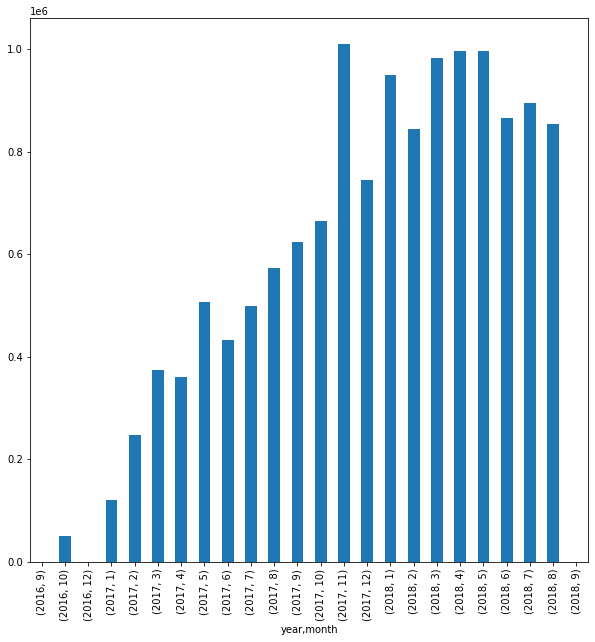

In [ ]:
g=month.groupby(["year","month"])["price"].sum()
g.plot.bar(figsize=(10,10))

As can be observed, the most revenue generating months were Nov 2017, April and May 2018 respectively

####Identifying Top 10 highest selling partners

In [ ]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

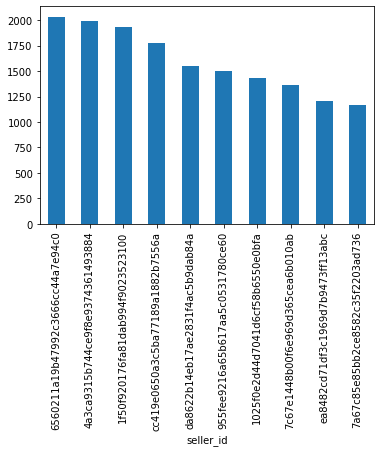

In [ ]:
#Top sellers

top_sell=order_items.groupby("seller_id")["product_id"].count().sort_values(ascending=False).head(10)
top_sell.plot.bar()

The above illustration is about the top 10 most sellers in terms of number of products sold

####Top 10 Sellers in terms of Revenue Generation

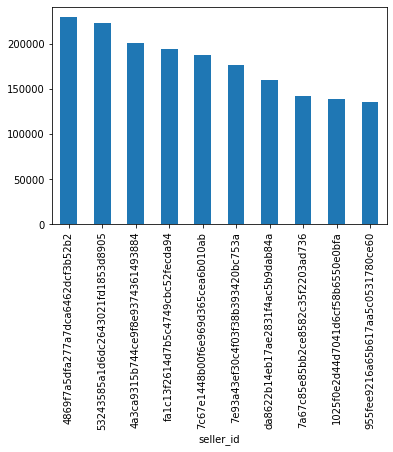

In [ ]:
top_sell=order_items.groupby("seller_id")["price"].sum().sort_values(ascending=False).head(10)
top_sell.plot.bar()

These are the top 10 sellers in terms of revenue generation

In [ ]:
statewise=order_items.groupby("seller_id")["price"].sum().sort_values(ascending=False).reset_index()
statewise=statewise.merge(right=sellers, how="inner", on="seller_id")
statewise.columns

Index(['seller_id', 'price', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

seller_state
SP    8753396.21
PR    1261887.21
MG    1011564.74
RJ     843984.22
SC     632426.07
RS     378559.54
BA     285561.56
DF      97749.48
PE      91493.85
GO      66399.21
Name: price, dtype: float64


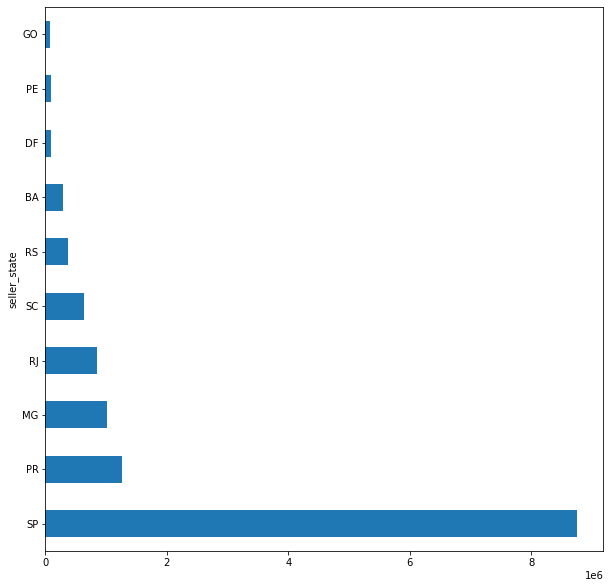

In [ ]:
#In terms of revenue generated
state_sell_grp=statewise.groupby("seller_state")["price"].sum().sort_values(ascending=False).head(10)
state_sell_grp.plot.barh(figsize=(10,10))
print(state_sell_grp)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: price, dtype: int64


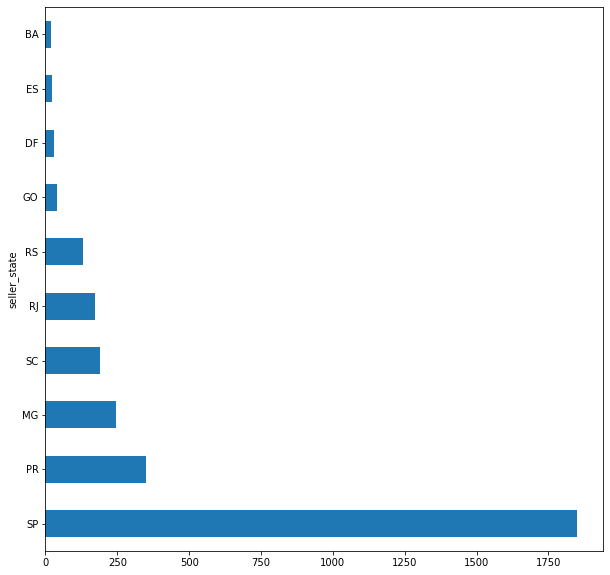

In [ ]:
#In terms of number of sales
state_sell_grp1=statewise.groupby("seller_state")["price"].count().sort_values(ascending=False).head(10)
state_sell_grp1.plot.barh(figsize=(10,10))
print(state_sell_grp1)

As can be observed, there is a huge opportunity here.

Inferences:

- There is a wide gap in the number of sellers affiliated with Olist between the different states
- Sao Polo leads margin in both number of products sold and revenue generated per seller.
- Sellers from Most of economically advanced states like Rio, Rio Grande do Sol are yet to partner with Olist.
- Carefully curate an entry strategy for them at the earliest because more number of affiliated sellers means more options for customers, which in term has a multiplier effect on the revenue generation.

####Average time taken to deliver orders

In [ ]:
t_orders=orders
t_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
t_orders["order_delivered_customer_date"]=t_orders["order_delivered_customer_date"].dt.normalize()
t_orders["order_purchase_timestamp"]=t_orders["order_purchase_timestamp"].dt.normalize()

In [ ]:
t_orders["time_to_deliver"]=t_orders["order_delivered_customer_date"]-t_orders["order_purchase_timestamp"]
t_orders["time_to_deliver"].mean()

Timedelta('12 days 11:56:09.841204')

It take on an average 13 days inorder to deliver the product to the customer from the time order is placed

####Average time between order placement and approval

In [ ]:
t_orders["order_approved_at"]=t_orders["order_approved_at"].dt.normalize()
t_orders["time_to approve"]=t_orders["order_approved_at"]-t_orders["order_purchase_timestamp"]

In [ ]:
t_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99281 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   time_to_deliver                96476 non-null  timedelta64[ns]
 9   time_to approve                99281 non-null  timedelta64[ns]
dtypes: datetime64[ns](5), object(3), timedelta64[ns](2)
memory usage: 7.6+

In [ ]:
t_orders["time_to approve"].mean()

Timedelta('0 days 12:26:39.097511')

It takes an average 12 hours for each order to get approved after delivery

####Time taken for the product to reach carrier

In [ ]:
t_orders["time_to_carrier"]=t_orders["order_delivered_carrier_date"]-t_orders["order_purchase_timestamp"]
t_orders["time_to_carrier"].mean()

Timedelta('3 days 20:53:35.585082')

On an average, it takes 3 days for a product to reach its carrier

####Time taken for the carrier to deliver the product

In [ ]:
t_orders["carry_time"]=t_orders["order_delivered_customer_date"]-t_orders["order_delivered_carrier_date"]
t_orders["carry_time"].mean()

Timedelta('8 days 15:11:12.779663')

Thus, the most time consuming process is thus the time in transit for the product

####Difference estimation and actual time of delivery

In [ ]:
t_orders["diff_del"]=t_orders["order_delivered_customer_date"]-t_orders["order_estimated_delivery_date"]
t_orders["diff_del"].mean()

Timedelta('-12 days +02:57:17.455947')

As per the observation, most orders are delivered before their estimated delivery date.

Overall observation is that the product delivery process is inefficient and thus reworking on it can improve consumer satisfaction

####Sellers who deliver the product in the least and worst timings

In [ ]:
#t_orders["time_to_deliver"]=t_orders["time_to_deliver"].apply(pd.to_numeric)
#t_orders["time_to_deliver"].apply(pd.to_numeric)
#x=x.days

#t_orders["time_to_deliver"]=t_orders["time_to_deliver"].dt.days
#t_orders["time_to_deliver"][0]
# t_orders=t_orders.merge(right=order_items, how="inner", on="order_id")
# t5=t_orders.groupby("seller_id_y")["time_to_deliver"].sum().sort_values(ascending=False).head(10)
# print(t5)
# t5.plot.bar(figsize=(5,5))

##Market Analysis of Olist

####Market Basket Analysis

In [ ]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


There are nearly 33,000 unique products. Let us do Market Basket Analysis for the top 100 products

In [ ]:
basket=order_items[["order_id","product_id"]]

#Finding the freq of each product in each order by groupby on OrderID and Product id
top100=basket.groupby(['product_id']).size().reset_index().sort_values(0, ascending=False).head(100)
top100.head()

,product_id,0
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527
19742,99a4788cb24856965c36a24e339b6058,488
8613,422879e10f46682990de24d770e7f83d,484
7364,389d119b48cf3043d311335e499d9c6b,392
7079,368c6c730842d78016ad823897a372db,388


In [ ]:
productID=top100["product_id"].reset_index()
productID.head()

,index,product_id
0,22112,aca2eb7d00ea1a7b8ebd4e68314663af
1,19742,99a4788cb24856965c36a24e339b6058
2,8613,422879e10f46682990de24d770e7f83d
3,7364,389d119b48cf3043d311335e499d9c6b
4,7079,368c6c730842d78016ad823897a372db


In [ ]:
#creating an iteration process

df=order_items[0:0]
for i in range (0,100):
    pID=productID.iloc[i]['product_id']
    stDF=order_items[order_items['product_id']==pID]
    df=df.append(stDF, ignore_index=False)
    
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

df contains the information of those products that belongs to top 100 category

In [ ]:
newdf=df[["order_id","product_id"]]
basket=newdf.groupby(["order_id","product_id"])["product_id"].count().unstack().reset_index().fillna(0).set_index("order_id")

In [ ]:
#Convert the data into a wide data where - row - transcation - column - products

basket=df.groupby(['order_id','product_id']).size().reset_index()
basket.head()

,order_id,product_id,0
0,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,1
1,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,2
2,00130c0eee84a3d909e75bc08c5c3ca1,89321f94e35fc6d7903d36f74e351d40,1
3,001862358bf858722e1e2ae000cfed8b,c6dd917a0be2a704582055949915ab32,1
4,001b76dd48a5b1eee3e87778daa40df8,dbb67791e405873b259e4656bf971246,1


In [ ]:
basket1=basket.pivot('order_id','product_id',0)
basket1.head()

product_id,06edb72f1e0c64b14c5b79353f7abea3,08574b074924071f4e201e151b152b4e,0a57f7d2c983bcf8188589a5fea4a8da,0aabfb375647d9738ad0f7b4ea3653b1,0bcc3eeca39e1064258aa1e932269894,0d85c435fd60b277ffb9e9b0f88f927a,154e7e31ebfa092203795c972e5804a6,165f86fe8b799a708a20ee4ba125c289,18b0e642cbae7251e60a64aa07dd9eb9,19c91ef95d509ea33eda93495c4d3481,2028bf1b01cafb2d2b1901fca4083222,2136c70bbe723d338fab53da3c03e6dc,29427de7f8a9ee983d9dbc51cec569b4,2948658cb6abc82847412be7201bfc4c,2b4609f8948be18874494203496bc318,3354a4e684f5e7199f9407db70ccd92b,35afc973633aaeb6b877ff57b2793310,362b773250263786dd58670d2df42c3b,363218ba55c610b750224f90bdd34be1,368c6c730842d78016ad823897a372db,36f60d45225e60c7da4558b070ce4b60,389d119b48cf3043d311335e499d9c6b,3dd2a17168ec895c781a9191c1e95ad7,3f14d740544f37ece8a9e7bc8349797e,3fbc0ef745950c7932d5f2a446189725,422879e10f46682990de24d770e7f83d,4298b7e67dc399c200662b569563a2b2,42a2c92a0979a949ca4ea89ec5c7b934,43423cdffde7fda63d0414ed38c11a73,437c05a395e9e47f9762e677a7068ce7,461f43be3bdf8844e65b62d9ac2c7a5a,473795a355d29305c3ea6b156833adf5,4c2394abfbac7ff59ec7a420918562fa,4fcb3d9a5f4871e8362dfedbdb02b064,4fe644d766c7566dbc46fb851363cb3b,52c80cedd4e90108bf4fa6a206ef6b03,53759a2ecddad2bb87a079a1f1519f73,53b36df67ebb7c41585e8d54d6772e08,5411e9269501a870cabf632f05655131,54d9ac713e253fa1fae9c8003b011c2a,...,84f456958365164420cfc80fbe4c7fab,880be32f4db1d9f6e2bec38fb6ac23ab,89321f94e35fc6d7903d36f74e351d40,8c292ca193d326152e335d77176746f0,8c591ab0ca519558779df02023177f44,99a4788cb24856965c36a24e339b6058,9ecadb84c81da840dbf3564378b586e9,a50acd33ba7a8da8e9db65094fa990a4,a62e25e09e05e6faf31d90c6ec1aa3d1,a92930c327948861c015c919a0bcb4a8,aca2eb7d00ea1a7b8ebd4e68314663af,b0961721fd839e9982420e807758a2a6,b532349fe46b38fbc7bb3914c1bdae07,b5e13c9a353102f79c6206ff5cb61a50,bb50f2e236e5eea0100680137654686c,bee2e070c39f3dd2f6883a17a5f0da45,c4baedd846ed09b85f78a781b522f126,c6336fa91fbd87c359e44f5dca5a90ed,c6dd917a0be2a704582055949915ab32,c9c6fde711572c1ad99ca12728c6af00,cac9e5692471a0700418aa3400b9b2b1,cd48f265a63e13b762601f5f794c5fca,d017a2151d543a9885604dc62a3d9dcc,d04857e7b4b708ee8b8b9921163edba3,d1c427060a0f73f6b889a5c7c61f2ac4,d285360f29ac7fd97640bf0baef03de0,d3c044bd42d84a79e3b0c42662806a48,d5991653e037ccb7af6ed7d94246b249,dbb67791e405873b259e4656bf971246,e0cf79767c5b016251fe139915c59a26,e0d64dcfaa3b6db5c54ca298ae101d05,e44f675b60b3a3a2453ec36421e06f0f,e53e557d5a159f5aa2c5e995dfdf244b,e7cc48a9daff5436f63d3aad9426f28b,eb8c629f70275fd1c4f809116cce1efc,ec2d43cc59763ec91694573b31f1c29a,ee0c1cf2fbeae95205b4aa506f1469f0,ee406bf28024d97771c4b1e8b7e8e219,f1c7f353075ce59d8a6f3cf58f419c9c,fb55982be901439613a95940feefd9ee
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0006ec9db01a64e59a68b2c340bf65a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0008288aa423d2a3f00fcb17cd7d8719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00130c0eee84a3d909e75bc08c5c3ca1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001862358bf858722e1e2ae000cfed8b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#Replacing NaN values

basket2= basket1.fillna(0)
basket2.head()

product_id,06edb72f1e0c64b14c5b79353f7abea3,08574b074924071f4e201e151b152b4e,0a57f7d2c983bcf8188589a5fea4a8da,0aabfb375647d9738ad0f7b4ea3653b1,0bcc3eeca39e1064258aa1e932269894,0d85c435fd60b277ffb9e9b0f88f927a,154e7e31ebfa092203795c972e5804a6,165f86fe8b799a708a20ee4ba125c289,18b0e642cbae7251e60a64aa07dd9eb9,19c91ef95d509ea33eda93495c4d3481,2028bf1b01cafb2d2b1901fca4083222,2136c70bbe723d338fab53da3c03e6dc,29427de7f8a9ee983d9dbc51cec569b4,2948658cb6abc82847412be7201bfc4c,2b4609f8948be18874494203496bc318,3354a4e684f5e7199f9407db70ccd92b,35afc973633aaeb6b877ff57b2793310,362b773250263786dd58670d2df42c3b,363218ba55c610b750224f90bdd34be1,368c6c730842d78016ad823897a372db,36f60d45225e60c7da4558b070ce4b60,389d119b48cf3043d311335e499d9c6b,3dd2a17168ec895c781a9191c1e95ad7,3f14d740544f37ece8a9e7bc8349797e,3fbc0ef745950c7932d5f2a446189725,422879e10f46682990de24d770e7f83d,4298b7e67dc399c200662b569563a2b2,42a2c92a0979a949ca4ea89ec5c7b934,43423cdffde7fda63d0414ed38c11a73,437c05a395e9e47f9762e677a7068ce7,461f43be3bdf8844e65b62d9ac2c7a5a,473795a355d29305c3ea6b156833adf5,4c2394abfbac7ff59ec7a420918562fa,4fcb3d9a5f4871e8362dfedbdb02b064,4fe644d766c7566dbc46fb851363cb3b,52c80cedd4e90108bf4fa6a206ef6b03,53759a2ecddad2bb87a079a1f1519f73,53b36df67ebb7c41585e8d54d6772e08,5411e9269501a870cabf632f05655131,54d9ac713e253fa1fae9c8003b011c2a,...,84f456958365164420cfc80fbe4c7fab,880be32f4db1d9f6e2bec38fb6ac23ab,89321f94e35fc6d7903d36f74e351d40,8c292ca193d326152e335d77176746f0,8c591ab0ca519558779df02023177f44,99a4788cb24856965c36a24e339b6058,9ecadb84c81da840dbf3564378b586e9,a50acd33ba7a8da8e9db65094fa990a4,a62e25e09e05e6faf31d90c6ec1aa3d1,a92930c327948861c015c919a0bcb4a8,aca2eb7d00ea1a7b8ebd4e68314663af,b0961721fd839e9982420e807758a2a6,b532349fe46b38fbc7bb3914c1bdae07,b5e13c9a353102f79c6206ff5cb61a50,bb50f2e236e5eea0100680137654686c,bee2e070c39f3dd2f6883a17a5f0da45,c4baedd846ed09b85f78a781b522f126,c6336fa91fbd87c359e44f5dca5a90ed,c6dd917a0be2a704582055949915ab32,c9c6fde711572c1ad99ca12728c6af00,cac9e5692471a0700418aa3400b9b2b1,cd48f265a63e13b762601f5f794c5fca,d017a2151d543a9885604dc62a3d9dcc,d04857e7b4b708ee8b8b9921163edba3,d1c427060a0f73f6b889a5c7c61f2ac4,d285360f29ac7fd97640bf0baef03de0,d3c044bd42d84a79e3b0c42662806a48,d5991653e037ccb7af6ed7d94246b249,dbb67791e405873b259e4656bf971246,e0cf79767c5b016251fe139915c59a26,e0d64dcfaa3b6db5c54ca298ae101d05,e44f675b60b3a3a2453ec36421e06f0f,e53e557d5a159f5aa2c5e995dfdf244b,e7cc48a9daff5436f63d3aad9426f28b,eb8c629f70275fd1c4f809116cce1efc,ec2d43cc59763ec91694573b31f1c29a,ee0c1cf2fbeae95205b4aa506f1469f0,ee406bf28024d97771c4b1e8b7e8e219,f1c7f353075ce59d8a6f3cf58f419c9c,fb55982be901439613a95940feefd9ee
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0006ec9db01a64e59a68b2c340bf65a7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0008288aa423d2a3f00fcb17cd7d8719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00130c0eee84a3d909e75bc08c5c3ca1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001862358bf858722e1e2ae000cfed8b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket2.applymap(encode_units)

In [ ]:
freq_items=apriori(basket_sets, min_support=0.0005, use_colnames=True)
freq_items.sort_values(by='support', ascending=False).head()

,support,itemsets
65,0.036850,(99a4788cb24856965c36a24e339b6058)
70,0.034009,(aca2eb7d00ea1a7b8ebd4e68314663af)
25,0.027776,(422879e10f46682990de24d770e7f83d)
84,0.025487,(d1c427060a0f73f6b889a5c7c61f2ac4)
21,0.024540,(389d119b48cf3043d311335e499d9c6b)


In [ ]:
rules = association_rules(freq_items, metric="lift", min_threshold=.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(99a4788cb24856965c36a24e339b6058),(35afc973633aaeb6b877ff57b2793310),0.036850,0.012310,0.002288,0.062099,5.044707,0.001835,1.053085
1,(35afc973633aaeb6b877ff57b2793310),(99a4788cb24856965c36a24e339b6058),0.012310,0.036850,0.002288,0.185897,5.044707,0.001835,1.183082
2,(368c6c730842d78016ad823897a372db),(53759a2ecddad2bb87a079a1f1519f73),0.022962,0.022647,0.000631,0.027491,1.213932,0.000111,1.004982
3,(53759a2ecddad2bb87a079a1f1519f73),(368c6c730842d78016ad823897a372db),0.022647,0.022962,0.000631,0.027875,1.213932,0.000111,1.005053
4,(3f14d740544f37ece8a9e7bc8349797e),(36f60d45225e60c7da4558b070ce4b60),0.006392,0.008759,0.000947,0.148148,16.914248,0.000891,1.163631
5,(36f60d45225e60c7da4558b070ce4b60),(3f14d740544f37ece8a9e7bc8349797e),0.008759,0.006392,0.000947,0.108108,16.914248,0.000891,1.114046
6,(e53e557d5a159f5aa2c5e995dfdf244b),(36f60d45225e60c7da4558b070ce4b60),0.012310,0.008759,0.002683,0.217949,24.883460,0.002575,1.267489
7,(36f60d45225e60c7da4558b070ce4b60),(e53e557d5a159f5aa2c5e995dfdf244b),0.008759,0.012310,0.002683,0.306306,24.883460,0.002575,1.423813
8,(389d119b48cf3043d311335e499d9c6b),(422879e10f46682990de24d770e7f83d),0.024540,0.027776,0.000868,0.035370,1.273412,0.000186,1.007873
9,(422879e10f46682990de24d770e7f83d),(389d119b48cf3043d311335e499d9c6b),0.027776,0.024540,0.000868,0.031250,1.273412,0.000186,1.006926


As you can observe, support being the number of times these transcations occur together out of the total number of transactions are kept very low. With the available data, there are limitations to the rules that we can develop.

###Sales forcasting using Recurrent Neural Networks

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'time_to_deliver', 'time_to approve', 'time_to_carrier', 'carry_time',
       'diff_del'],
      dtype='object')

In [ ]:
temp=order_items[["order_id","price"]]
temp=temp.merge(right=orders, how="inner", on="order_id")
temp=temp[["order_purchase_timestamp","order_id","price"]]
temp.head()

,order_purchase_timestamp,order_id,price
0,2017-09-13,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,2017-04-26,00018f77f2f0320c557190d7a144bdd3,239.90
2,2018-01-14,000229ec398224ef6ca0657da4fc703e,199.00
3,2018-08-08,00024acbcdf0a6daa1e931b038114c75,12.99
4,2017-02-04,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


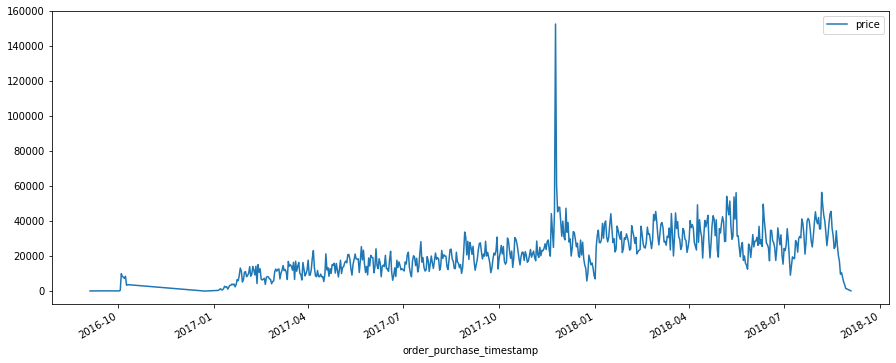

In [ ]:
grp=temp.groupby("order_purchase_timestamp")["price"].sum().reset_index().sort_values(by="price",ascending=False)
grp.plot(x="order_purchase_timestamp",y="price", figsize=(15,6))

So, I am planning to train the neural network from March 2017 to March 2018 and then predict the sales for the month of April 2018

In [ ]:
#Preparing Training data
start=pd.to_datetime("2017-03-01")
end=pd.to_datetime("2018-04-30")

mask = (grp['order_purchase_timestamp'] > start) & (grp['order_purchase_timestamp'] <= end)
training_data=grp.loc[mask]
training_data.shape

(425, 2)

In [ ]:
#Preparing Test data
start=pd.to_datetime("2018-05-01")
end=pd.to_datetime("2018-05-31")

mask = (grp['order_purchase_timestamp'] > start) & (grp['order_purchase_timestamp'] <= end)
test_data=grp.loc[mask]
test_data.shape

(30, 2)

In [ ]:
training_set=training_data.iloc[:,1:2].values

In [ ]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
#Creating data structure with 10 timesteps and one output

X_train = [] # list containing all the previous 60 net sales values
y_train = []
for i in range(10, 425):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])

#We are converting the X_train and y_train into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#reshaping to create the 3D structure expected by the neural network

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#initializing RNN
regressor = Sequential() #regressor represents a sequence of layers

In [ ]:
#Adding first LSTM Model
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#units represent the number of LSTM cells or units we want to have in this LSTM layer
#We chose a large number as the number of neurons to increase the dimensionality
#return sequence is supposed to be true if we are adding additional layers of LSTM

regressor.add(Dropout(0.2))
#Dropout rate is the rate of neurons you want to drop or ignore in the layers. The classic number is .20
#During each iteration of the training 20% of the neuron will be dropped out

In [ ]:
#Adding additional layers of LSTM

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#so, in total we have 4 layers of LSTM

#Adding the output layer

regressor.add(Dense(units = 1))

In [ ]:
#compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Fitting RNN to the training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
#epoch is the number of times the data is forward propagated and readjusted for weights

Epoch 1/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0057
Epoch 2/100
415/415 [==============================] - 0s 851us/step - loss: 0.0024
Epoch 3/100
415/415 [==============================] - 0s 879us/step - loss: 7.4333e-04
Epoch 4/100
415/415 [==============================] - 0s 877us/step - loss: 4.0305e-04
Epoch 5/100
415/415 [==============================] - 0s 870us/step - loss: 2.6319e-04
Epoch 6/100
415/415 [==============================] - 0s 870us/step - loss: 3.1978e-04
Epoch 7/100
415/415 [==============================] - 0s 852us/step - loss: 2.5240e-04
Epoch 8/100
415/415 [==============================] - 0s 916us/step - loss: 2.8261e-04
Epoch 9/100
415/415 [==============================] - 0s 878us/step - loss: 3.0777e-04
Epoch 10/100
415/415 [==============================] - 0s 846us/step - loss: 2.0408e-04
Epoch 11/100
415/415 [==============================] - 0s 869us/step - loss: 2.4839e-04
Epoch 12/100
415/415 [==================

In [ ]:
#Making predictions and visualizing results

testing_set=test_data.iloc[:,1:2].values

In [ ]:
#getting the real sales value for may 2018

dataset_total = pd.concat((training_data['price'], test_data['price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, 40):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_sales_values = regressor.predict(X_test)
predicted_sales_values = sc.inverse_transform(predicted_sales_values)

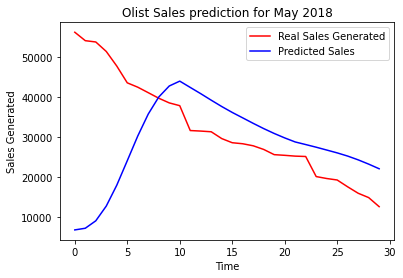

In [ ]:
#visualizing predictions

plt.plot(testing_set, color = 'red', label = 'Real Sales Generated')
plt.plot(predicted_sales_values, color = 'blue', label = 'Predicted Sales')
plt.title('Olist Sales prediction for May 2018')
plt.xlabel('Time')
plt.ylabel('Sales Generated')
plt.legend()
plt.show()

Epoch 1/100
30/30 [==============================] - 2s 53ms/step - loss: 0.0402
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 7.5618e-04
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 13/100
30/30 [============

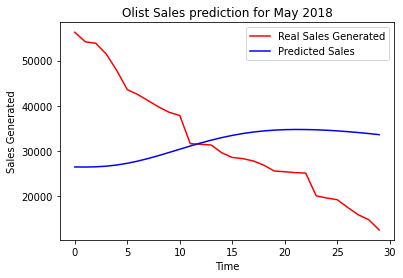

In [ ]:
#Trying for 30 timesteps

#Preparing Training data
start=pd.to_datetime("2017-03-01")
end=pd.to_datetime("2018-04-30")
mask = (grp['order_purchase_timestamp'] > start) & (grp['order_purchase_timestamp'] <= end)
training_data=grp.loc[mask]

#Preparing Test data
start=pd.to_datetime("2018-05-01")
end=pd.to_datetime("2018-05-31")
mask = (grp['order_purchase_timestamp'] > start) & (grp['order_purchase_timestamp'] <= end)
test_data=grp.loc[mask]

training_set=training_data.iloc[:,1:2].values

#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#Creating data structure with 60 timesteps and one output
X_train = [] # list containing all the previous 60 net sales values
y_train = []
for i in range(30, 60):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])

#We are converting the X_train and y_train into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#reshaping to create the 3D structure expected by the neural network
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#initializing RNN
regressor = Sequential() #regressor represents a sequence of layers
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

testing_set=test_data.iloc[:,1:2].values
dataset_total = pd.concat((training_data['price'], test_data['price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 60):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_sales_values = regressor.predict(X_test)
predicted_sales_values = sc.inverse_transform(predicted_sales_values)

#visualizing predictions
plt.plot(testing_set, color = 'red', label = 'Real Sales Generated')
plt.plot(predicted_sales_values, color = 'blue', label = 'Predicted Sales')
plt.title('Olist Sales prediction for May 2018')
plt.xlabel('Time')
plt.ylabel('Sales Generated')
plt.legend()
plt.show()

Epoch 1/100
30/30 [==============================] - 2s 61ms/step - loss: 0.0282
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 8.0746e-04
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 7.5754e-04
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 11/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 12/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 13/100
30/30 [========

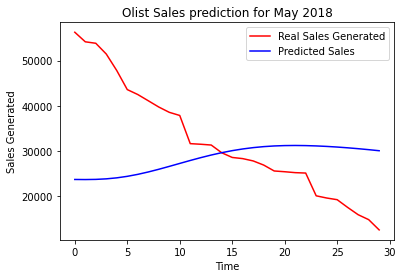

In [ ]:
#Trying for 60 timesteps

#Preparing Training data
start=pd.to_datetime("2017-03-01")
end=pd.to_datetime("2018-04-30")
mask = (grp['order_purchase_timestamp'] > start) & (grp['order_purchase_timestamp'] <= end)
training_data=grp.loc[mask]

#Preparing Test data
start=pd.to_datetime("2018-05-01")
end=pd.to_datetime("2018-05-31")
mask = (grp['order_purchase_timestamp'] > start) & (grp['order_purchase_timestamp'] <= end)
test_data=grp.loc[mask]

training_set=training_data.iloc[:,1:2].values

#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#Creating data structure with 60 timesteps and one output
X_train = [] # list containing all the previous 60 net sales values
y_train = []
for i in range(60, 90):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

#We are converting the X_train and y_train into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#reshaping to create the 3D structure expected by the neural network
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#initializing RNN
regressor = Sequential() #regressor represents a sequence of layers
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

testing_set=test_data.iloc[:,1:2].values
dataset_total = pd.concat((training_data['price'], test_data['price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_sales_values = regressor.predict(X_test)
predicted_sales_values = sc.inverse_transform(predicted_sales_values)

#visualizing predictions
plt.plot(testing_set, color = 'red', label = 'Real Sales Generated')
plt.plot(predicted_sales_values, color = 'blue', label = 'Predicted Sales')
plt.title('Olist Sales prediction for May 2018')
plt.xlabel('Time')
plt.ylabel('Sales Generated')
plt.legend()
plt.show()

As can be observed, there is no significant difference in the prediction by using different timesteps with RNN. Overall, the prediction is not good. Availing more data and adding more dimensions to the may improve the model and the prediction

###Finding the products that are mostly purchased using vouchers as the mode of payment

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
order_pay.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
voucher=order_items.merge(right=order_pay, how="inner", on="order_id")
voucher=voucher.merge(right=products, how="inner", on="product_id")

In [ ]:
voucher.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
voucher["payment_type"].value_counts()

credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: payment_type, dtype: int64

In [ ]:
temp=voucher[voucher["payment_type"]=="voucher"].groupby(["product_category_name_english","product_id"])["payment_type"].count().sort_values(ascending= False)

In [ ]:
temp.head(20)

product_category_name_english  product_id                      
bed_bath_table                 99a4788cb24856965c36a24e339b6058    48
                               ebf9bc6cd600eadd681384e3116fda85    42
office_furniture               0554911df28fda9fd668ce5ba5949695    36
garden_tools                   1aecdb5fa3add74e385f25c6c527a462    29
                               422879e10f46682990de24d770e7f83d    28
home_confort                   35afc973633aaeb6b877ff57b2793310    25
bed_bath_table                 777d2e438a1b645f3aec9bd57e92672c    25
                               8d37ee446981d3790967d0268d6cfc81    25
electronics                    bdc3291ab242ec1effc8eb0987850268    23
agro_industry_and_commerce     11250b0d4b709fee92441c5f34122aed    22
garden_tools                   0449db5eede617c5fd413071d582f038    22
perfumery                      ee0c1cf2fbeae95205b4aa506f1469f0    21
garden_tools                   53759a2ecddad2bb87a079a1f1519f73    21
housewares                

Voucher is a promotional element. The above list contains the top 20 products for which payment is made using vouchers. As can be observed, products that are being used in home are the ones for which vouchers are mostly issued.

###Checking the effect of time in processing the purchase on cancellation

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'time_to_deliver', 'time_to approve', 'time_to_carrier', 'carry_time',
       'diff_del'],
      dtype='object')

In [ ]:
orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
cancel=orders[orders["order_status"]=="canceled"]

In [ ]:
cancel.shape

(625, 13)

A total of 625 orders where cancelled during the time intervel under consideration

In [ ]:
cancel["time_to approve"].mean()

Timedelta('0 days 16:09:55.041322')

In [ ]:
orders["time_to approve"].mean()

Timedelta('0 days 12:26:39.097511')

As can be observed, time to approval for the cancelled products are higher on average compared to the net mean approval timing. This may have an impact on order cancelation

In [ ]:
cancel["carry_time"].mean()

Timedelta('12 days 16:16:18.833333')

In [ ]:
orders["carry_time"].mean()

Timedelta('8 days 15:11:12.779663')

Overall conclusion is that time taken play an important role in the cancelation decisions made by consumers

###Sellers from whom most orders were cancelled

In [ ]:
cancel.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'time_to_deliver', 'time_to approve', 'time_to_carrier', 'carry_time',
       'diff_del'],
      dtype='object')

In [ ]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 397 to 99347
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       625 non-null    object         
 1   customer_id                    625 non-null    object         
 2   order_status                   625 non-null    object         
 3   order_purchase_timestamp       625 non-null    datetime64[ns] 
 4   order_approved_at              484 non-null    datetime64[ns] 
 5   order_delivered_carrier_date   75 non-null     datetime64[ns] 
 6   order_delivered_customer_date  6 non-null      datetime64[ns] 
 7   order_estimated_delivery_date  625 non-null    datetime64[ns] 
 8   time_to_deliver                6 non-null      timedelta64[ns]
 9   time_to approve                484 non-null    timedelta64[ns]
 10  time_to_carrier                75 non-null     timedelta64[ns]
 11  ca

In [ ]:
temp=cancel.merge(right=order_items, how="inner", on="order_id")
cancel_sellers=temp.groupby("seller_id")["order_id"].count().sort_values(ascending=False).head(10)
cancel_sellers

seller_id
cc419e0650a3c5ba77189a1882b7556a    9
6560211a19b47992c3666cc44a7e94c0    8
620c87c171fb2a6dd6e8bb4dec959fc6    7
0adac9fbd9a2b63cccaac4f8756c1ca8    7
8a32e327fe2c1b3511609d81aaf9f042    7
ec4608a1f76453166bb312b2968aeaf4    6
855668e0971d4dfd7bef1b6a4133b41b    6
81783131d2a97c8d44d406a4be81b5d9    6
a4b6b9b992b46e9ef863637af96e04bc    6
73a63f72308aa20a46f4b1632018f196    5
Name: order_id, dtype: int64

These are the sellers with highest cancellations